In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statistics as s

## Heatmaps of main results

In [476]:
resultsfile = 'Bact_holdout_results.csv'
results = pd.read_csv(resultsfile)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 15 columns):
positive label         384 non-null object
label tax group        384 non-null object
pool label             384 non-null object
pool tax group         384 non-null object
Baltimore              384 non-null object
virus holdout group    384 non-null object
training group         384 non-null object
N in class             384 non-null int64
Features               384 non-null object
k                      384 non-null int64
AUC                    384 non-null float64
accuracy               384 non-null float64
specificity            384 non-null float64
sensitivity            384 non-null float64
TN/FP/FN/TP            384 non-null object
dtypes: float64(4), int64(2), object(9)
memory usage: 45.1+ KB


### Add DNA_2 file

In [477]:
resultsDNA2file = 'Bact_holdout_dna2_results.csv'
resultsDNA2 = pd.read_csv(resultsDNA2file)

resdf = pd.concat([results,resultsDNA2])
results = resdf
resdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 432 entries, 0 to 47
Data columns (total 15 columns):
positive label         432 non-null object
label tax group        432 non-null object
pool label             432 non-null object
pool tax group         432 non-null object
Baltimore              432 non-null object
virus holdout group    432 non-null object
training group         432 non-null object
N in class             432 non-null int64
Features               432 non-null object
k                      432 non-null int64
AUC                    432 non-null float64
accuracy               432 non-null float64
specificity            432 non-null float64
sensitivity            432 non-null float64
TN/FP/FN/TP            432 non-null object
dtypes: float64(4), int64(2), object(9)
memory usage: 54.0+ KB


In [478]:
correct_tg = lambda row:'Holdout' if row['training group']== 'oldout' else row['training group']
results['training_group']= results.apply(correct_tg , axis=1)
results.drop(['training group'], axis = 1, inplace = True)

concat_ds = lambda row: f'{row["virus holdout group"]}_{row["positive label"]}_{row["training_group"]}'
results['Dataset']= results.apply(concat_ds , axis=1)


concat_fs = lambda row : f'{row["Features"]}_{row["k"]}'
results['Feature set']= results.apply(concat_fs , axis=1)

In [479]:
tax_order =['p','c','o','f','g','s']
fs_order =['DNA_2','DNA_3','DNA_6','DNA_9','AA_3','AA_4','PC_5','PC_6','Domain_1']
#ds_list = list(set(results['dataset']))
#df.apply(lambda row: row['task'].split('_')[1] , axis=1)
results['tax'] = results.apply(lambda row: row['label tax group'][0], axis = 1)
results['tax'] = results['tax'].astype('category')
results['tax'].cat.set_categories(tax_order, inplace=True)
results['Feature set'] = results['Feature set'].astype('category')
results['Feature set'].cat.set_categories(fs_order, inplace=True)

In [481]:
results.head(30)

,positive label,label tax group,pool label,pool tax group,Baltimore,virus holdout group,N in class,Features,k,AUC,accuracy,specificity,sensitivity,TN/FP/FN/TP,training_group,Dataset,Feature set,tax
0,Bacteroidetes,phylum,Bacteria,kingdom,DNA,Siphoviridae,63,DNA,3,0.950,0.804,0.690,0.955,[20 9 1 21],Holdout,Siphoviridae_Bacteroidetes_Holdout,DNA_3,p
1,Bacteroidetes,phylum,Bacteria,kingdom,DNA,Siphoviridae,63,DNA,6,0.989,0.941,1.000,0.864,[29 0 3 19],Holdout,Siphoviridae_Bacteroidetes_Holdout,DNA_6,p
2,Bacteroidetes,phylum,Bacteria,kingdom,DNA,Siphoviridae,63,DNA,9,0.980,0.588,1.000,0.045,[29 0 21 1],Holdout,Siphoviridae_Bacteroidetes_Holdout,DNA_9,p
3,Bacteroidetes,phylum,Bacteria,kingdom,DNA,Siphoviridae,63,AA,3,0.975,0.569,1.000,0.000,[29 0 22 0],Holdout,Siphoviridae_Bacteroidetes_Holdout,AA_3,p
4,Bacteroidetes,phylum,Bacteria,kingdom,DNA,Siphoviridae,63,AA,4,0.917,0.569,1.000,0.000,[29 0 22 0],Holdout,Siphoviridae_Bacteroidetes_Holdout,AA_4,p
5,Bacteroidetes,phylum,Bacteria,kingdom,DNA,Siphoviridae,63,PC,5,0.862,0.569,1.000,0.000,[29 0 22 0],Holdout,Siphoviridae_Bacteroidetes_Holdout,PC_5,p
6,Bacteroidetes,phylum,Bacteria,kingdom,DNA,Siphoviridae,63,PC,6,0.868,0.569,1.000,0.000,[29 0 22 0],Holdout,Siphoviridae_Bacteroidetes_Holdout,PC_6,p
7,Bacteroidetes,phylum,Bacteria,kingdom,DNA,Siphoviridae,63,Domain,1,0.458,0.588,0.897,0.182,[26 3 18 4],Holdout,Siphoviridae_Bacteroidetes_Holdout,Domain_1,p
8,Bacteroidetes,phylum,Bacteria,kingdom,DNA,Siphoviridae,89,DNA,3,0.955,0.900,0.812,1.000,[13 3 0 14],All,Siphoviridae_Bacteroidetes_All,DNA_3,p
9,Bacteroidetes,phylum,Bacteria,kingdom,DNA,Siphoviridae,89,DNA,6,1.000,0.933,0.875,1.000,[14 2 0 14],All,Siphoviridae_Bacteroidetes_All,DNA_6,p


In [224]:
results.sort_values(by = ['tax','positive label'],inplace=True)

In [228]:
results.head()

,positive label,label tax group,pool label,pool tax group,Baltimore,virus holdout group,N in class,Features,k,AUC,accuracy,specificity,sensitivity,TN/FP/FN/TP,training_group,Dataset,Feature set,tax
0,Bacteroidetes,phylum,Bacteria,kingdom,DNA,Siphoviridae,64,DNA,2,0.572,0.529,0.448,0.636,[13 16 8 14],Holdout,Siphoviridae_Bacteroidetes_Holdout,DNA_2,p
1,Bacteroidetes,phylum,Bacteria,kingdom,DNA,Siphoviridae,89,DNA,2,0.951,0.867,0.750,1.000,[12 4 0 14],All,Siphoviridae_Bacteroidetes_All,DNA_2,p
0,Bacteroidetes,phylum,Bacteria,kingdom,DNA,Siphoviridae,63,DNA,3,0.950,0.804,0.690,0.955,[20 9 1 21],Holdout,Siphoviridae_Bacteroidetes_Holdout,DNA_3,p
8,Bacteroidetes,phylum,Bacteria,kingdom,DNA,Siphoviridae,89,DNA,3,0.955,0.900,0.812,1.000,[13 3 0 14],All,Siphoviridae_Bacteroidetes_All,DNA_3,p
1,Bacteroidetes,phylum,Bacteria,kingdom,DNA,Siphoviridae,63,DNA,6,0.989,0.941,1.000,0.864,[29 0 3 19],Holdout,Siphoviridae_Bacteroidetes_Holdout,DNA_6,p


In [485]:
unique =[]
[unique.append(ds) for ds in(list(results['Dataset']))if ds not in unique ]
unique

['Siphoviridae_Bacteroidetes_Holdout',
 'Siphoviridae_Bacteroidetes_All',
 'Siphoviridae_Actinobacteria_Holdout',
 'Siphoviridae_Actinobacteria_All',
 'Siphoviridae_Firmicutes_Holdout',
 'Siphoviridae_Firmicutes_All',
 'Siphoviridae_Proteobacteria_Holdout',
 'Siphoviridae_Proteobacteria_All',
 'Podoviridae_Cyanobacteria_Holdout',
 'Podoviridae_Cyanobacteria_All',
 'Podoviridae_Firmicutes_Holdout',
 'Podoviridae_Firmicutes_All',
 'Podoviridae_Proteobacteria_Holdout',
 'Podoviridae_Proteobacteria_All',
 'Myoviridae_Cyanobacteria_Holdout',
 'Myoviridae_Cyanobacteria_All',
 'Myoviridae_Firmicutes_Holdout',
 'Myoviridae_Firmicutes_All',
 'Myoviridae_Proteobacteria_Holdout',
 'Myoviridae_Proteobacteria_All',
 'Siphoviridae_Bacillales_Holdout',
 'Siphoviridae_Bacillales_All',
 'Myoviridae_Bacillales_Holdout',
 'Myoviridae_Bacillales_All',
 'Podoviridae_Bacillales_Holdout',
 'Podoviridae_Bacillales_All',
 'Siphoviridae_Lactobacillales_Holdout',
 'Siphoviridae_Lactobacillales_All',
 'Myoviridae

In [587]:
dfn  =  results[~(results['Feature set'].isin(['DNA_3'])) ]

In [602]:
df1 = dfn.pivot( 'Feature set','Dataset', 'AUC')
#df1 = df.reindex(unique)


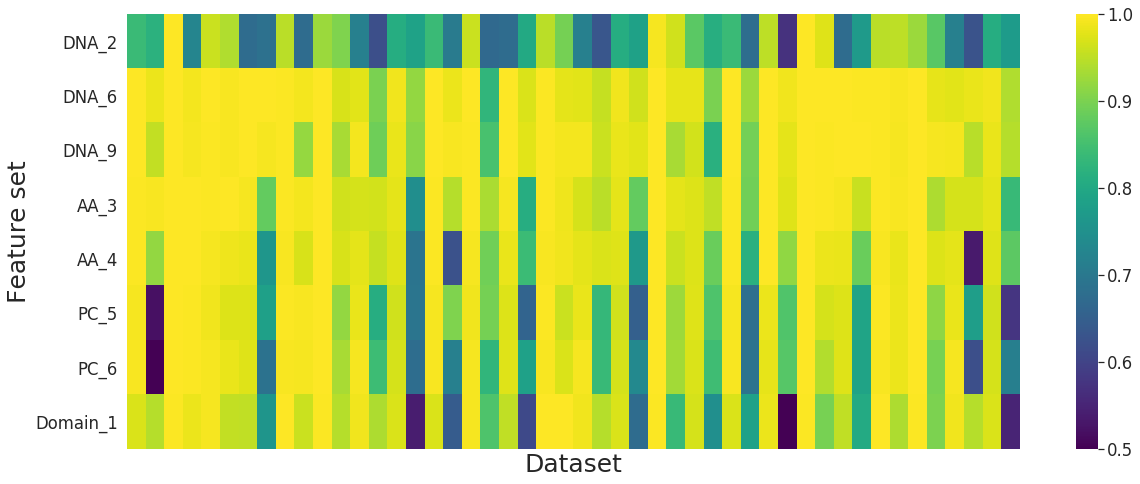

In [611]:
sns.set(font_scale=1.5, palette = 'viridis')
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(20, 8))
plt.xticks(rotation='vertical')
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    top=False,      # ticks along the bottom edge are off
     bottom=False,         # ticks along the top edge are off
    labelbottom=False
    )
ax.set_ylabel(ax.get_ylabel(), fontsize=25)
ax.set_xlabel(ax.get_xlabel(), fontsize=25)
sns.heatmap(df1,cmap = 'viridis', vmin = 0.5,   ax=ax)

In [612]:
f.savefig('Figures/heatmap_HO_Bact_no_ds.png', bbox_inches="tight")

### Sort the dataset order

In [486]:
ho_df = results[results.training_group=='Holdout']
ho_df = ho_df.rename(columns={'AUC':'ho_AUC'})
ho_df = ho_df[['Dataset','Feature set','tax','ho_AUC']]


ho_df['Dataset']= ho_df.apply( lambda row: row['Dataset'][:-8] , axis=1)

In [487]:

ho_df.head()

,Dataset,Feature set,tax,ho_AUC
0,Siphoviridae_Bacteroidetes,DNA_3,p,0.950
1,Siphoviridae_Bacteroidetes,DNA_6,p,0.989
2,Siphoviridae_Bacteroidetes,DNA_9,p,0.980
3,Siphoviridae_Bacteroidetes,AA_3,p,0.975
4,Siphoviridae_Bacteroidetes,AA_4,p,0.917


In [488]:
results.head()

,positive label,label tax group,pool label,pool tax group,Baltimore,virus holdout group,N in class,Features,k,AUC,accuracy,specificity,sensitivity,TN/FP/FN/TP,training_group,Dataset,Feature set,tax
0,Bacteroidetes,phylum,Bacteria,kingdom,DNA,Siphoviridae,63,DNA,3,0.950,0.804,0.69,0.955,[20 9 1 21],Holdout,Siphoviridae_Bacteroidetes_Holdout,DNA_3,p
1,Bacteroidetes,phylum,Bacteria,kingdom,DNA,Siphoviridae,63,DNA,6,0.989,0.941,1.00,0.864,[29 0 3 19],Holdout,Siphoviridae_Bacteroidetes_Holdout,DNA_6,p
2,Bacteroidetes,phylum,Bacteria,kingdom,DNA,Siphoviridae,63,DNA,9,0.980,0.588,1.00,0.045,[29 0 21 1],Holdout,Siphoviridae_Bacteroidetes_Holdout,DNA_9,p
3,Bacteroidetes,phylum,Bacteria,kingdom,DNA,Siphoviridae,63,AA,3,0.975,0.569,1.00,0.000,[29 0 22 0],Holdout,Siphoviridae_Bacteroidetes_Holdout,AA_3,p
4,Bacteroidetes,phylum,Bacteria,kingdom,DNA,Siphoviridae,63,AA,4,0.917,0.569,1.00,0.000,[29 0 22 0],Holdout,Siphoviridae_Bacteroidetes_Holdout,AA_4,p


In [489]:
all_df = results[results.training_group=='All']

In [490]:
all_df = all_df.rename(columns={'AUC':'all_AUC'})

In [491]:
all_df = all_df[['Dataset','Feature set','tax','all_AUC']]


In [492]:
all_df.head()

,Dataset,Feature set,tax,all_AUC
8,Siphoviridae_Bacteroidetes_All,DNA_3,p,0.955
9,Siphoviridae_Bacteroidetes_All,DNA_6,p,1.000
10,Siphoviridae_Bacteroidetes_All,DNA_9,p,1.000
11,Siphoviridae_Bacteroidetes_All,AA_3,p,1.000
12,Siphoviridae_Bacteroidetes_All,AA_4,p,1.000


In [493]:
all_df['Dataset']= all_df.apply( lambda row: row['Dataset'][:-4] , axis=1)
all_df.head()

,Dataset,Feature set,tax,all_AUC
8,Siphoviridae_Bacteroidetes,DNA_3,p,0.955
9,Siphoviridae_Bacteroidetes,DNA_6,p,1.000
10,Siphoviridae_Bacteroidetes,DNA_9,p,1.000
11,Siphoviridae_Bacteroidetes,AA_3,p,1.000
12,Siphoviridae_Bacteroidetes,AA_4,p,1.000


In [501]:
ratios_df = pd.merge(all_df,ho_df, on= ['Dataset','Feature set'])
ratios_df.head()
ratios_df['ratios']= ratios_df.apply( lambda row:  row['ho_AUC']/row['all_AUC']  , axis=1)

In [503]:
#row:'Holdout' if row['training group']== 'oldout' else row['training group']
a= ratios_df['ho_AUC']-0.5
b= ratios_df['all_AUC']- 0.5 

ratios_df['ratios2'] =((ratios_df['ho_AUC']-0.5)/(ratios_df['all_AUC']- 0.5)).replace(np.inf,1)

#ratios_df['ratios']= ratios_df.apply( lambda row:  row['ho_AUC']/row['all_AUC']  , axis=1)
#
ratios_df['ratio3']= ratios_df.apply( lambda row:  (row['ho_AUC']-0.5)/(row['all_AUC']- 0.5 ) , axis=1)

In [509]:
fs_order =['DNA_2','DNA_6','DNA_9','AA_3','AA_4','PC_5','PC_6','Domain_1']

ratios_df.head()

,Dataset,Feature set,tax_x,all_AUC,tax_y,ho_AUC,ratios,ratios2,ratio3,ratios4
0,Siphoviridae_Bacteroidetes,DNA_3,p,0.955,p,0.950,0.994764,0.989011,0.989011,0.989011
1,Siphoviridae_Bacteroidetes,DNA_6,p,1.000,p,0.989,0.989000,0.978000,0.978000,0.978000
2,Siphoviridae_Bacteroidetes,DNA_9,p,1.000,p,0.980,0.980000,0.960000,0.960000,0.960000
3,Siphoviridae_Bacteroidetes,AA_3,p,1.000,p,0.975,0.975000,0.950000,0.950000,0.950000
4,Siphoviridae_Bacteroidetes,AA_4,p,1.000,p,0.917,0.917000,0.834000,0.834000,0.834000


In [508]:
ratios_df['ratios4']= ratios_df.apply( lambda row:  row ['ratio3'] if row['ratio3'] <= 1  else 1 , axis=1)
ratios_df['ratios4']= ratios_df.apply( lambda row:  row ['ratios4'] if row['ratios4'] >0  else 0 , axis=1)

In [407]:
from collections import Counter
bad_fs = Counter(list(ratios_df[ (ratios_df['ratios'] < 0.75)]['Feature set']))
bad_fs


Counter({'AA_4': 3, 'DNA_2': 4, 'Domain_1': 6, 'PC_5': 6, 'PC_6': 7})

In [474]:

ratios_df[ratios_df.ratios4 >1 ]

AttributeError: 'DataFrame' object has no attribute 'ratios4'

In [510]:
#concat_ds = lambda row: f'{row["virus holdout group"]}_{row["positive label"]}_{row["training_group"]}'
#results['Dataset']= results.apply(concat_ds , axis=1)
ds=  lambda row:  f'{row ["Dataset"].split("_")[1]}_{row ["Dataset"].split("_")[0]}' 
ratios_df['DS'] = ratios_df.apply (ds, axis =1)                       

In [511]:
#df1 = ratios_df.sort_values('tax_x')
unique =[]
[unique.append(ds) for ds in(list(results['Dataset']))if ds not in unique ]
unique

['Siphoviridae_Bacteroidetes_Holdout',
 'Siphoviridae_Bacteroidetes_All',
 'Siphoviridae_Actinobacteria_Holdout',
 'Siphoviridae_Actinobacteria_All',
 'Siphoviridae_Firmicutes_Holdout',
 'Siphoviridae_Firmicutes_All',
 'Siphoviridae_Proteobacteria_Holdout',
 'Siphoviridae_Proteobacteria_All',
 'Podoviridae_Cyanobacteria_Holdout',
 'Podoviridae_Cyanobacteria_All',
 'Podoviridae_Firmicutes_Holdout',
 'Podoviridae_Firmicutes_All',
 'Podoviridae_Proteobacteria_Holdout',
 'Podoviridae_Proteobacteria_All',
 'Myoviridae_Cyanobacteria_Holdout',
 'Myoviridae_Cyanobacteria_All',
 'Myoviridae_Firmicutes_Holdout',
 'Myoviridae_Firmicutes_All',
 'Myoviridae_Proteobacteria_Holdout',
 'Myoviridae_Proteobacteria_All',
 'Siphoviridae_Bacillales_Holdout',
 'Siphoviridae_Bacillales_All',
 'Myoviridae_Bacillales_Holdout',
 'Myoviridae_Bacillales_All',
 'Podoviridae_Bacillales_Holdout',
 'Podoviridae_Bacillales_All',
 'Siphoviridae_Lactobacillales_Holdout',
 'Siphoviridae_Lactobacillales_All',
 'Myoviridae

In [512]:
unique1 =[ f'{s.split("_")[1]}_{s.split("_")[0]}' for s in unique ]
unique2 =[]
[unique2.append(ds) for ds in unique1 if ds not in unique2 ]
(unique2.sort())
unique2

['Actinobacteria_Siphoviridae',
 'Bacillaceae_Siphoviridae',
 'Bacillales_Myoviridae',
 'Bacillales_Podoviridae',
 'Bacillales_Siphoviridae',
 'Bacteroidetes_Siphoviridae',
 'Clostridiales_Myoviridae',
 'Clostridiales_Siphoviridae',
 'Cyanobacteria_Myoviridae',
 'Cyanobacteria_Podoviridae',
 'Enterobacterales_Myoviridae',
 'Enterobacterales_Podoviridae',
 'Enterobacterales_Siphoviridae',
 'Firmicutes_Myoviridae',
 'Firmicutes_Podoviridae',
 'Firmicutes_Siphoviridae',
 'Lactobacillales_Myoviridae',
 'Lactobacillales_Siphoviridae',
 'Proteobacteria_Myoviridae',
 'Proteobacteria_Podoviridae',
 'Proteobacteria_Siphoviridae',
 'Pseudomonadales_Myoviridae',
 'Pseudomonadales_Podoviridae',
 'Pseudomonadales_Siphoviridae']

In [573]:
ratios_df['ratios5']= ratios_df.apply( lambda row:  row ['ratios'] if row['ratios'] <= 1  else 1 , axis=1)
ratios_df['ratios5']= ratios_df.apply( lambda row:  row ['ratios5'] if row['ratios5'] >0.5  else 0.5 , axis=1)

In [574]:
df = ratios_df.pivot('DS','Feature set', 'ratios5')
#df2 = df.reindex(unique2)

In [575]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, Actinobacteria_Siphoviridae to Pseudomonadales_Siphoviridae
Data columns (total 8 columns):
DNA_2       24 non-null float64
DNA_6       24 non-null float64
DNA_9       24 non-null float64
AA_3        24 non-null float64
AA_4        24 non-null float64
PC_5        24 non-null float64
PC_6        24 non-null float64
Domain_1    24 non-null float64
dtypes: float64(8)
memory usage: 1.7+ KB


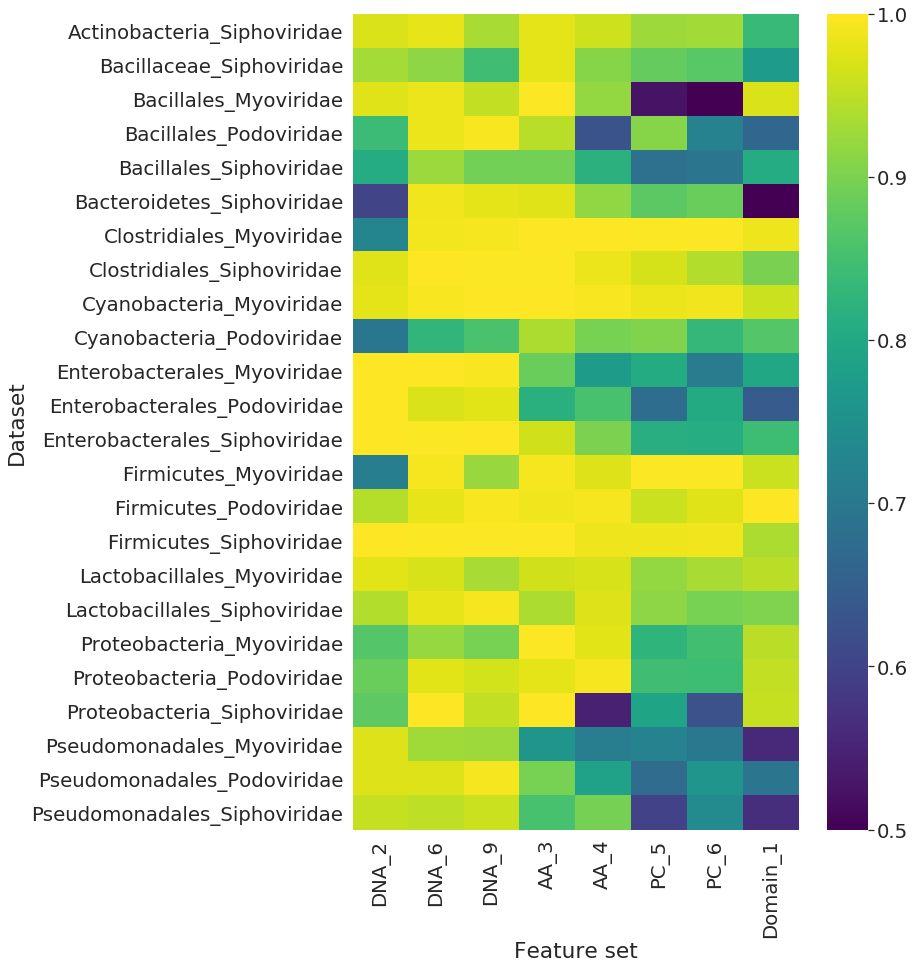

In [581]:
f, ax = plt.subplots(figsize=(10, 15))

sns.heatmap(df,cmap = 'viridis',  ax=ax) 
plt.ylabel ( 'Dataset' )
f.savefig('Figures/heatmap_ratios_Bact.png', bbox_inches="tight", dpi=500)

In [526]:

fs2drop = ['DNA_3']
#ss= df[df.tax == t]
df = ratios_df[ratios_df['Feature set'] != 'DNA_3'] 
fs_order =['DNA_2','DNA_6','DNA_9','AA_3','AA_4','PC_5','PC_6','Domain_1']
set(df['Feature set'])

{'AA_3', 'AA_4', 'DNA_2', 'DNA_6', 'DNA_9', 'Domain_1', 'PC_5', 'PC_6'}

In [564]:
ratios_df['Feature set'].cat.set_categories(fs_order, inplace=True)

/home4/youn01f/Desktop/workspace/myenv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


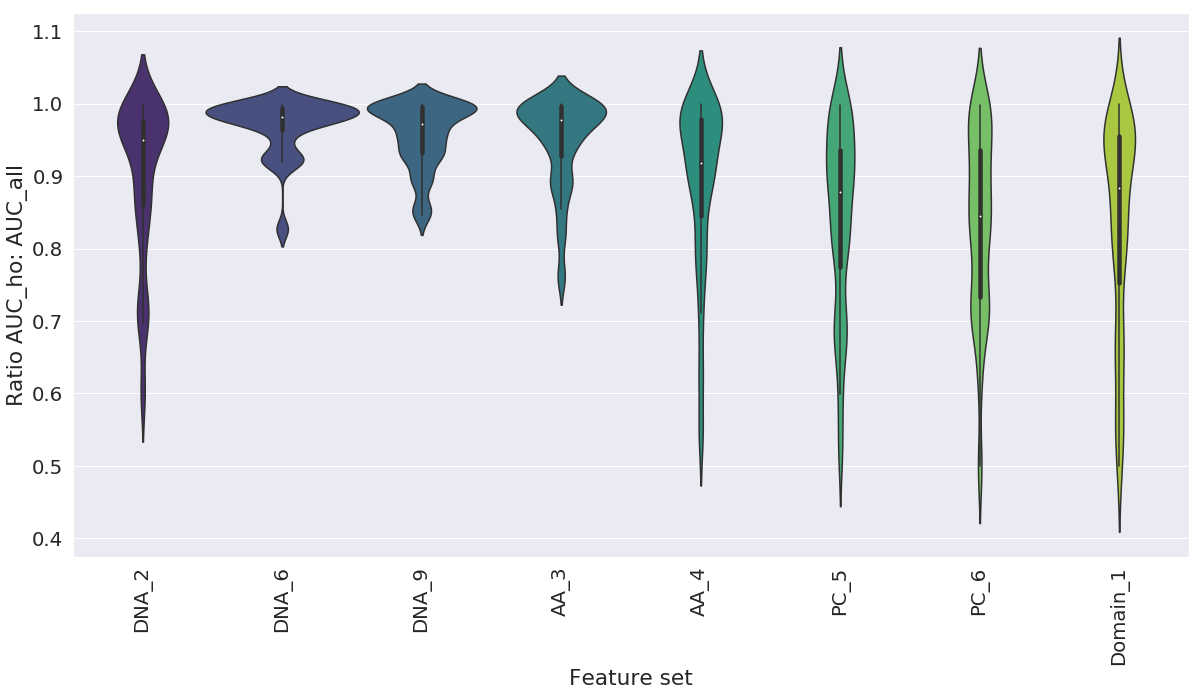

In [594]:
g, ax = plt.subplots(figsize=(20, 10))
#
#plt.xticks(rotation='vertical')
#plt.title(f' Ratios  ALL_AUC:HO_AUC ')
f = sns.violinplot( x = 'Feature set', y ='ratios5',  palette = 'viridis',width = 1.1,bw = .3,
                ax =ax, data = ratios_df)
plt.xticks(rotation='vertical')
plt.ylabel ( 'Ratio AUC_ho: AUC_all' )
#ax.set(ylim = (0,1.25) ) 
#f = sns.catplot( x = 'Feature set', y ='ratios2', kind = 'violin',  palette = 'viridis',#width = 1,
 #               ax =ax, data = ratios_df)
#sns.swarmplot( x = 'Feature set', y ='ratio', cut = 1,
#                ax =ax, data = ratios_df)
g.savefig('Figures/violinplot_ratios_Bact.png', bbox_inches="tight", dpi=500)